<a href="https://colab.research.google.com/github/fjmsouza/ImageProcessing/blob/main/LISTA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANEXO I

# PROCESSAMENTO DE IMAGENS - LISTA 2

# QUESTÃO PRÁTICA 1:
****

ABRIR, LER E MOSTRAR IMAGENS:

Normal image shape: (512, 512, 3)
Pattern image shape: (256, 256, 3)


(-0.5, 255.5, 255.5, -0.5)

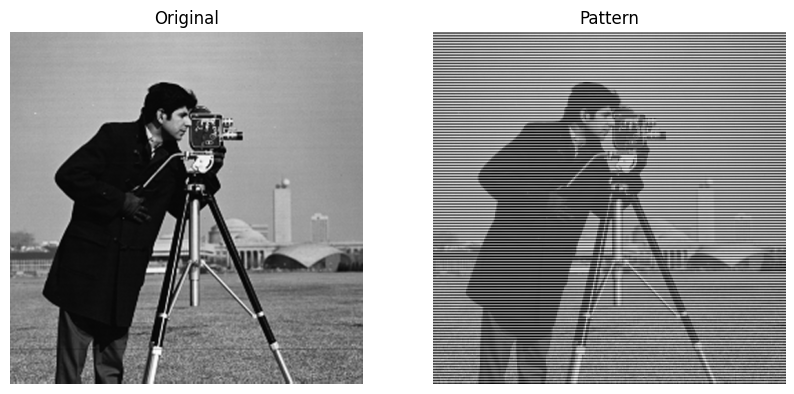

In [ ]:
from matplotlib import pyplot as plt
import cv2

input_image_normal = cv2.imread('cameraman.bmp')

print("Normal image shape:",input_image_normal.shape)

input_image_pattern = cv2.imread('cameraman_pattern.bmp')

print("Pattern image shape:",input_image_pattern.shape)

fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(input_image_normal)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(input_image_pattern)
ax[1].set_title('Pattern')
ax[1].axis('off')



"VISUALIZANDO" AS TRANFORMADAS DE FOURIER (DOMÍNIO DA FREQUÊNCIA):

Fourier image shape: (256, 256)


Text(0.5, 1.0, 'Pattern')

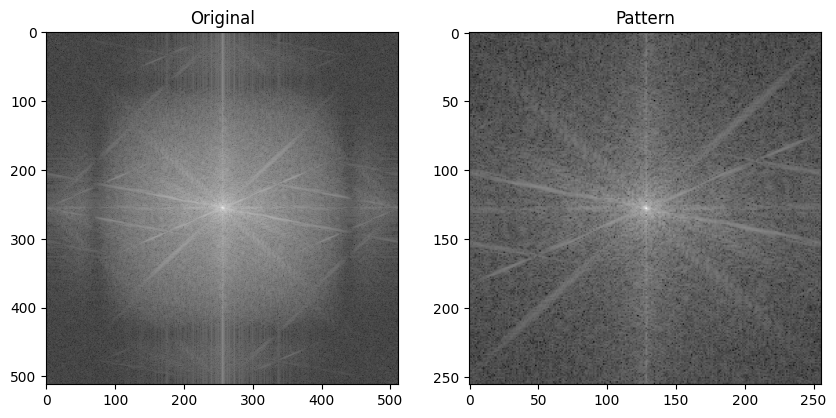

In [ ]:
import numpy as np
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv

#converting the 3 channels RGB in 1, allows to reach the Fourier Transform:
input_image_normal_gray = rgb2gray(input_image_normal)

#in fact, the Fourier Transform of the normal image
cameraman_normal_fourier = np.fft.fftshift(np.fft.fft2(input_image_normal_gray))

#converting the 3 channel RGB in 1:
input_image_pattern_gray = rgb2gray(input_image_pattern)

#in fact, the Fourier Transform of the noisy image
cameraman_pattern_fourier = np.fft.fftshift(np.fft.fft2(input_image_pattern_gray))
print("Fourier image shape:",cameraman_pattern_fourier.shape)


fig, ax = plt.subplots(1,2,figsize=(10,10))
#to allow us to see better the transform, the log operation upon the real component
ax[0].imshow(np.log(abs(cameraman_normal_fourier)), cmap='gray')
ax[0].set_title('Original')
#to allow us to see better the transform, the log operation upon the real component
ax[1].imshow(np.log(abs(cameraman_pattern_fourier)), cmap='gray')
ax[1].set_title('Pattern')



****

ELIMINAÇÃO DO PADRÃO DE LINHAS:

## a) Via filtro no domínio da frequência:

MANIPULANDO MÁSCARA SOBRE A FFT DO CAMERAMAN_PATTERN

De acordo com a imagem da FFT não consigo evidenciar, claramente, um "padrão" a eliminar, mas, supondo que as listras horizontais correspondam à componente vertical da Transformada.
Então, tal máscara tratar-se-á de um filtro Notch ideal. Temos o efeito do Teorema da Convolução, a multiplicação da FFT da imagem com tal filtro(máscara).

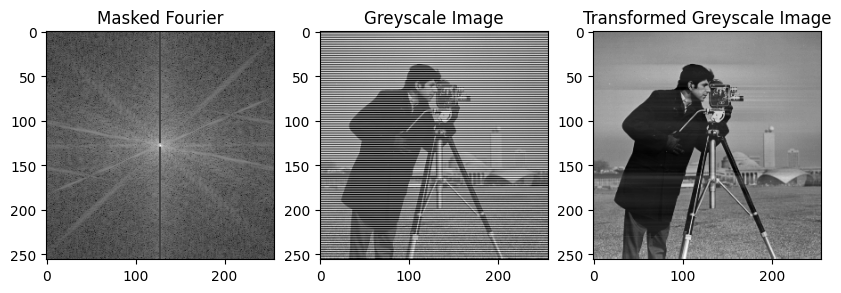

In [ ]:
#performing a copy
cameraman_pattern_fourier_copy = np.copy(cameraman_pattern_fourier)

#creating a mask above the copy
#indexes chosen through try-and-error until achieve an aceptable visual result

#vertical mask
cameraman_pattern_fourier_copy[:126,127:129] = 1
cameraman_pattern_fourier_copy[-126:,127:129] = 1

#horizontal mask
# cameraman_pattern_fourier_copy[127:129, :126] = 1
# cameraman_pattern_fourier_copy[127:129, :-126] = 1


fig, ax = plt.subplots(1,3,figsize=(10,10))
ax[0].imshow(np.log(abs(cameraman_pattern_fourier_copy)), cmap='gray')
ax[0].set_title('Masked Fourier')

ax[1].imshow(input_image_pattern_gray, cmap = 'gray')
ax[1].set_title('Greyscale Image');

#obtaining the inverse trasform of the filtered FFT
ax[2].imshow(abs(np.fft.ifft2(cameraman_pattern_fourier_copy)), cmap='gray')
ax[2].set_title('Transformed Greyscale Image');

****
## b) Via filtro no domínio espacial:

Gerando um filtro 2D Passa-Baixa do tipo Gaussiano:

In [ ]:
import numpy as np

x, y = np.meshgrid(np.linspace(-1,1,3), np.linspace(-1,1,3))
d = np.sqrt(x*x+y*y)
sigma = 1.0

#assuming the maximum amplitude equal to 1
peak = 1  #1/2*pi*sigma**2
g = peak*(np.exp(-( d**2 / ( 2.0 * sigma**2 ) ) ))

print(g)

[[0.36787944 0.60653066 0.36787944]
 [0.60653066 1.         0.60653066]
 [0.36787944 0.60653066 0.36787944]]


Convoluindo a imagem ruidosa com dois LPF Gaussianos: o obtido acima e um nativo da biblioteca

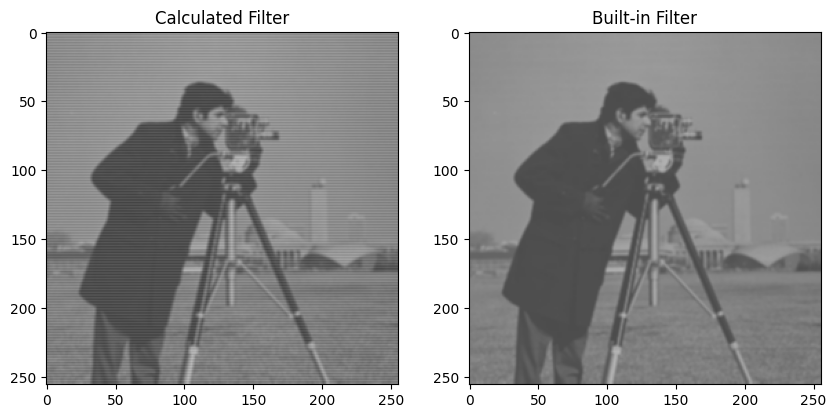

In [ ]:
#Gaussian filter aproximation
kernel = np.array([ [0.4, 0.6, 0.4],
                    [0.6, 1,   0.6],
                    [0.4, 0.6, 0.4]])/ 5

#obtaining a image through created kernel(filter) above
result1 = cv2.filter2D(src=input_image_pattern, ddepth=-1, kernel=kernel)

#obtaining a image through built-in kernel by library
result2 = cv2.GaussianBlur(src=input_image_pattern,ksize=(3,3),sigmaX=0)


fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(result1, cmap='gray')
ax[0].set_title('Calculated Filter')

ax[1].imshow(result2, cmap = 'gray')
ax[1].set_title('Built-in Filter');

****
# QUESTÃO PRÁTICA 2:
****

## a)

(i) Filtrar a imagem com o filtro Box e, no resultado gerado, aplicar o filtro  Laplaciano:

(ii) Filtrar a imagem com o filtro Laplaciano, primeiro, e, no resultado  gerado, aplicar o filtro Box.


<built-in method sum of numpy.ndarray object at 0x7de33ca54330>


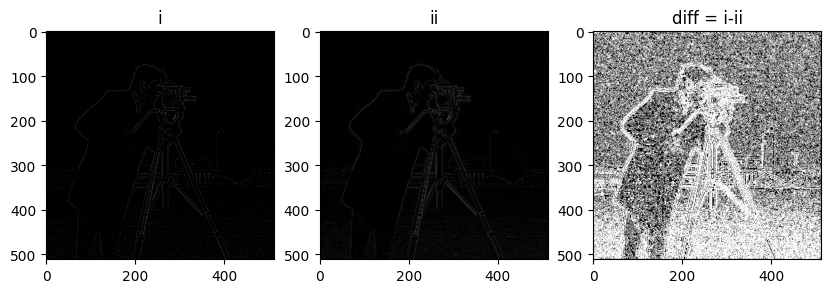

In [ ]:
kernel_box = np.ones((3, 3), np.float32) / 9

kernel_laplacian = np.array([[0, 1, 0],
                             [1,-4, 1],
                             [0, 1, 0]])

#i)
convolution_1_1 = cv2.filter2D(src=input_image_normal, ddepth=-1, kernel=kernel_box)
convolution_1_2 = cv2.filter2D(src=convolution_1_1, ddepth=-1, kernel=kernel_laplacian)

#ii)
convolution_2_1 = cv2.filter2D(src=input_image_normal, ddepth=-1, kernel=kernel_laplacian)
convolution_2_2 = cv2.filter2D(src=convolution_2_1, ddepth=-1, kernel=kernel_box)

diff = convolution_1_2 - convolution_2_2

fig, ax = plt.subplots(1,3,figsize=(10,10))
ax[0].imshow(convolution_1_2, cmap='gray')
ax[0].set_title('i')

ax[1].imshow(convolution_2_2, cmap = 'gray')
ax[1].set_title('ii');


ax[2].imshow(diff, cmap = 'gray')
ax[2].set_title('diff = i-ii');
print(diff.sum)

## b)

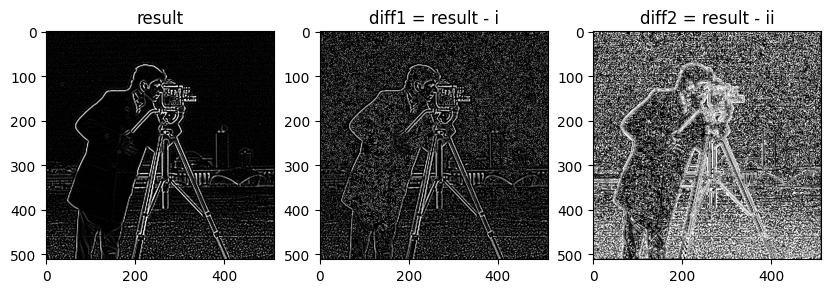

In [ ]:
#resulting kernel from convolution between box and laplacian filters, as demostrated in documentation
kernel_result = np.array([   [0, 1,  1,  1, 0],
                             [1,-2, -1, -2, 1],
                             [1,-1,  0, -1, 1],
                             [1,-2, -1, -2, 1],
                             [0, 1,  1,  1, 0]
                             ])


result = cv2.filter2D(src=input_image_normal, ddepth=-1, kernel=kernel_result)

diff1 = result - convolution_1_2


diff2 = result - convolution_2_2

fig, ax = plt.subplots(1,3,figsize=(10,10))
ax[0].imshow(result, cmap='gray')
ax[0].set_title('result')

ax[1].imshow(diff1, cmap = 'gray')
ax[1].set_title('diff1 = result - i');


ax[2].imshow(diff2, cmap = 'gray')
ax[2].set_title('diff2 = result - ii');